In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('C:\\Users\\devri\\Desktop\\abalone.csv')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df.shape

(4177, 9)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [8]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

<AxesSubplot:ylabel='Sex'>

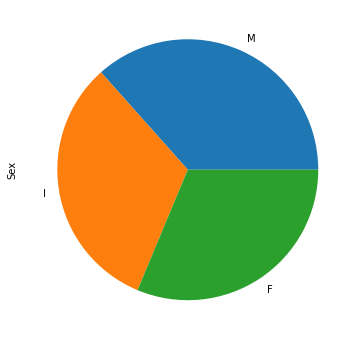

In [12]:
df['Sex'].value_counts().plot(kind='pie', figsize = (6,6))

In [14]:
corr = df.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


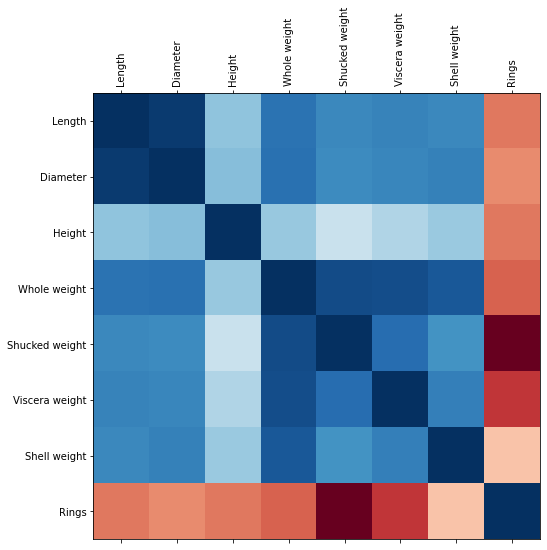

In [15]:
fig = plt.figure(figsize = (8,8))
plt.matshow(corr, cmap = 'RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [39]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
print(X)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


In [18]:
print(y)

[15  7  9 ...  9 10 12]


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [25]:
print(X)

[[0.0 0.0 1.0 ... 0.2245 0.101 0.15]
 [0.0 0.0 1.0 ... 0.0995 0.0485 0.07]
 [1.0 0.0 0.0 ... 0.2565 0.1415 0.21]
 ...
 [0.0 0.0 1.0 ... 0.5255 0.2875 0.308]
 [1.0 0.0 0.0 ... 0.531 0.261 0.296]
 [0.0 0.0 1.0 ... 0.9455 0.3765 0.495]]


In [26]:
print(y)

[15  7  9 ...  9 10 12]


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [29]:
print(X_train)

[[0.0 0.0 1.0 ... -0.7997387084099149 -0.33233002291649055
  -0.5658505354959167]
 [0.0 1.0 0.0 ... -1.4890421286566522 -1.4919656683695677
  -1.555788143058005]
 [0.0 1.0 0.0 ... -0.6420549194645828 -0.8117069629659909
  -0.39492605649239065]
 ...
 [0.0 1.0 0.0 ... -1.3020742074786156 -1.4052212696939437
  -1.4026682972840128]
 [1.0 0.0 0.0 ... 0.2567426775238098 -0.15884122556524266
  -0.423413469659645]
 [0.0 1.0 0.0 ... -1.3989371064021767 -1.3550008283554247
  -1.4204729305135468]]


In [30]:
print(X_test)

[[1.0 0.0 0.0 ... -0.7704545761772104 -0.8527964149702338
  -0.7795061342503242]
 [0.0 0.0 1.0 ... 0.9933512344541469 0.019213066453143104
  -0.23824528407249182]
 [0.0 0.0 1.0 ... -1.2097165596677781 -1.1130296109971054
  -1.1712080653000714]
 ...
 [1.0 0.0 0.0 ... 0.8649515777415195 0.5807689105111292
  0.27808907958399337]
 [1.0 0.0 0.0 ... 1.241140045653954 1.4756058652701969 1.3926591197528193]
 [1.0 0.0 0.0 ... 1.191582283413993 0.9414429892150389 0.7873015899486644]]


In [31]:
print(y_train)

[11  4  8 ...  5  7  9]


In [32]:
print(y_test)

[10  8  9 10 16  6  9 10 12  9 11  4  9 10  6  8 15 13 10 10 12 14  6 15
  7  9 12 17 10 11 10  9  8  7  9 12 12 14 11 11  9  9 11  9  7  9 11  8
 11  9 10  9 13  5 13 11 10  6  7  6  9  9 16 10 12  9 10 11 11  7  8 10
  6  8  7  7 11 11  9 10  7  8 10  7 15  7 15 10 12  9 12 12  8  9  6  8
  9 10  6 19  8 12 10  7 14  7 15 11 14  8  9 11  9  8  7 10  7  7  9 10
 11  8  8 12  9  8 13  9  7  8  8  6  7  8 11  7 12 15  9  9 10 11 11 13
 10  7 12 12 10 10  9 10  8  9  8 10  9 11  9 14  9 11 10  7  8  8 10  9
  9 16  6 14 15  7 10 14 16 17  5  6  7 10 10  9  7 13 21  8 12 10  7  8
  5 10  7 12  6  3  8 10  3  9 15  9  6 11  8  7  9  7 12  6  9  8  8 10
  9 11  9  9 18  8 10 10  7 14 10 11 10 12 11 10 10 11  8  6 10 13 11 10
 14 12  8  9  7 10 13 12  8 12 10 18 11 11  5 17 10 17 10 10 12 15  6  9
 10  9 12 10  8 11  9 16 13 10 10 15 10  9 11 12  9  9 10  6  6  7  6  6
  6  8  7  8 11  9  8 11  8  9 14  9 18  8  8  9 13  8 20  8 11  9  9  9
  9 11  4 21 11 11 10  5 10 13 11 10 18 10  7 14  9

In [43]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [44]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2) 
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 9 10]
 [ 9  8]
 [ 7  9]
 ...
 [ 9  8]
 [11 10]
 [10  8]]


In [45]:
#Making the Confusion Matrix and the accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  8  6  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  4 13 24  5  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  7 30 20 21  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2 18 36 41  9  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  8 28 61 31  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  8 11 64 43 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8 30 37 16  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3 24 25  8  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  5 18 11  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5 15  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4 14  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  4  1  0

0.2595693779904306

In [40]:
#Predicting a new result.(Transform the observation to the right format into the new scale)
print(classifier.predict(sc.transform([[0.544,0.345,0.125,0.5670,0.2375,0.1278,0.222]])))

ValueError: X has 7 features, but LogisticRegression is expecting 10 features as input.